# 데이터프레임 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
covid19 = pd.read_csv('WHO-COVID-19-global-data(weekly).csv', parse_dates=['Date_reported'])
covid19

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-03-01,AF,Afghanistan,EMRO,0,5,0,0
1,2020-03-08,AF,Afghanistan,EMRO,0,8,0,0
2,2020-03-15,AF,Afghanistan,EMRO,6,20,0,0
3,2020-03-22,AF,Afghanistan,EMRO,10,34,0,0
4,2020-03-29,AF,Afghanistan,EMRO,8,114,1,4
...,...,...,...,...,...,...,...,...
5240,2020-07-19,ZW,Zimbabwe,AFRO,58,1478,1,25
5241,2020-07-26,ZW,Zimbabwe,AFRO,138,2434,2,34
5242,2020-08-02,ZW,Zimbabwe,AFRO,490,3659,2,69
5243,2020-08-09,ZW,Zimbabwe,AFRO,124,4575,0,102


In [3]:
# 불필요한 columns 삭제 : 컬럼명에 있는 사소한 부분(띄어쓰기 등 에러 발생요인이 됨) 주의.
covid19 = covid19.drop([' WHO_region'], axis=1)
# 컬럼명 변경
covid19 = covid19.rename(columns={'Date_reported':'날짜',' Country_code':'국가코드',' Country':'국가',' New_cases':'확진자(주)',
                                  ' Cumulative_cases':'확진자(총)',' New_deaths':'사망자(주)', ' Cumulative_deaths':'사망자(총)'})

In [4]:
covid19 = covid19[covid19['국가'].isin(['Republic of Korea','United States of America','Brazil','India','Mexico',
                                       'Spain','The United Kingdom','France','Italy','Germany'])]
covid19

,날짜,국가코드,국가,확진자(주),확진자(총),사망자(주),사망자(총)
651,2020-03-01,BR,Brazil,1,6,0,0
652,2020-03-08,BR,Brazil,0,23,0,0
653,2020-03-15,BR,Brazil,0,125,0,0
654,2020-03-22,BR,Brazil,0,904,0,11
655,2020-03-29,BR,Brazil,502,3417,15,92
...,...,...,...,...,...,...,...
5051,2020-07-26,US,United States of America,74235,4084043,1135,144798
5052,2020-08-02,US,United States of America,67499,4523888,1365,152630
5053,2020-08-09,US,United States of America,61028,4897958,1324,159930
5054,2020-08-16,US,United States of America,55359,5258565,1206,167201


In [5]:
# 대상 국가 총 인구 데이터프레임 생성
pop = pd.DataFrame({
    '국가코드':['KR','US','BR','IN','MX','ES','GB','FR','IT','DE'],
    '총 인구':['51780579','331002651','212559417','1380004385','128932753',
           '46754778','67886011','65273511','60461826','83783942']
})
# int로 데이터 타입 변경
pop = pop.astype({'총 인구':'int'})
print(pop)

# covid19에 총 인구 붙이기
covid19 = pd.merge(covid19, pop, on = '국가코드', how = "left")
covid19

  국가코드        총 인구
0   KR    51780579
1   US   331002651
2   BR   212559417
3   IN  1380004385
4   MX   128932753
5   ES    46754778
6   GB    67886011
7   FR    65273511
8   IT    60461826
9   DE    83783942


,날짜,국가코드,국가,확진자(주),확진자(총),사망자(주),사망자(총),총 인구
0,2020-03-01,BR,Brazil,1,6,0,0,212559417
1,2020-03-08,BR,Brazil,0,23,0,0,212559417
2,2020-03-15,BR,Brazil,0,125,0,0,212559417
3,2020-03-22,BR,Brazil,0,904,0,11,212559417
4,2020-03-29,BR,Brazil,502,3417,15,92,212559417
...,...,...,...,...,...,...,...,...
286,2020-07-26,US,United States of America,74235,4084043,1135,144798,331002651
287,2020-08-02,US,United States of America,67499,4523888,1365,152630,331002651
288,2020-08-09,US,United States of America,61028,4897958,1324,159930,331002651
289,2020-08-16,US,United States of America,55359,5258565,1206,167201,331002651


In [7]:
# 열 위치 변경
covid19 = covid19[['날짜','국가코드','국가','총 인구','확진자(주)','확진자(총)','사망자(주)','사망자(총)']]
covid19

,날짜,국가코드,국가,총 인구,확진자(주),확진자(총),사망자(주),사망자(총)
0,2020-03-01,BR,Brazil,212559417,1,6,0,0
1,2020-03-08,BR,Brazil,212559417,0,23,0,0
2,2020-03-15,BR,Brazil,212559417,0,125,0,0
3,2020-03-22,BR,Brazil,212559417,0,904,0,11
4,2020-03-29,BR,Brazil,212559417,502,3417,15,92
...,...,...,...,...,...,...,...,...
286,2020-07-26,US,United States of America,331002651,74235,4084043,1135,144798
287,2020-08-02,US,United States of America,331002651,67499,4523888,1365,152630
288,2020-08-09,US,United States of America,331002651,61028,4897958,1324,159930
289,2020-08-16,US,United States of America,331002651,55359,5258565,1206,167201


In [8]:
#인구 100만명 당 통계
new_cases = round(covid19['확진자(주)']/covid19['총 인구']*1000000, 0)
cum_cases = round(covid19['확진자(총)']/covid19['총 인구']*1000000, 0)
new_deaths = round(covid19['사망자(주)']/covid19['총 인구']*1000000, 0)
cum_deaths = round(covid19['사망자(총)']/covid19['총 인구']*1000000, 0)

add_new_c = pd.concat([covid19,new_cases], axis=1)
add_cum_c = pd.concat([add_new_c,cum_cases], axis=1)
add_new_d = pd.concat([add_cum_c,new_deaths], axis=1)
add_cum_d = pd.concat([add_new_d,cum_deaths], axis=1)
covid19 = add_cum_d

# int로 데이터 타입 변경
covid19 = covid19.astype('int', errors='ignore')
covid19

covid19

,날짜,국가코드,국가,총 인구,확진자(주),확진자(총),사망자(주),사망자(총),0,0,0,0
0,2020-03-01,BR,Brazil,212559417,1,6,0,0,0,0,0,0
1,2020-03-08,BR,Brazil,212559417,0,23,0,0,0,0,0,0
2,2020-03-15,BR,Brazil,212559417,0,125,0,0,0,1,0,0
3,2020-03-22,BR,Brazil,212559417,0,904,0,11,0,4,0,0
4,2020-03-29,BR,Brazil,212559417,502,3417,15,92,2,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
286,2020-07-26,US,United States of America,331002651,74235,4084043,1135,144798,224,12338,3,437
287,2020-08-02,US,United States of America,331002651,67499,4523888,1365,152630,204,13667,4,461
288,2020-08-09,US,United States of America,331002651,61028,4897958,1324,159930,184,14797,4,483
289,2020-08-16,US,United States of America,331002651,55359,5258565,1206,167201,167,15887,4,505


In [48]:
covid19.columns = ['날짜','국가코드','국가','총 인구','확진자(주)','확진자(총)','사망자(주)','사망자(총)',
                   '백만 명당 확진자(주)','백만 명당 확진자(총)','백만 명당 사망자(주)','백만 명당 사망자(총)']
covid19.to_csv('df_covid19.csv')
covid19

,날짜,국가코드,국가,총 인구,확진자(주),확진자(총),사망자(주),사망자(총),백만 명당 확진자(주),백만 명당 확진자(총),백만 명당 사망자(주),백만 명당 사망자(총)
0,2020-03-01,BR,Brazil,212559417,1,6,0,0,0,0,0,0
1,2020-03-08,BR,Brazil,212559417,0,23,0,0,0,0,0,0
2,2020-03-15,BR,Brazil,212559417,0,125,0,0,0,1,0,0
3,2020-03-22,BR,Brazil,212559417,0,904,0,11,0,4,0,0
4,2020-03-29,BR,Brazil,212559417,502,3417,15,92,2,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
286,2020-07-26,US,United States of America,331002651,74235,4084043,1135,144798,224,12338,3,437
287,2020-08-02,US,United States of America,331002651,67499,4523888,1365,152630,204,13667,4,461
288,2020-08-09,US,United States of America,331002651,61028,4897958,1324,159930,184,14797,4,483
289,2020-08-16,US,United States of America,331002651,55359,5258565,1206,167201,167,15887,4,505


In [10]:
search_mask = pd.read_csv('search_mask.csv', parse_dates=['날짜'])
search_mask = search_mask.astype('int', errors='ignore')
search_mask

,날짜,국가,검색량
0,2020-02-02,대한민국,77
1,2020-02-09,대한민국,49
2,2020-02-16,대한민국,31
3,2020-02-23,대한민국,135
4,2020-03-01,대한민국,132
...,...,...,...
295,2020-07-26,독일,38
296,2020-08-02,독일,43
297,2020-08-09,독일,40
298,2020-08-16,독일,37


# 국가별 통계

## 대한민국

In [11]:
KR = covid19[covid19.국가 == 'Republic of Korea']
KRM = search_mask[search_mask.국가 == '대한민국']
KR = KR.set_index('날짜')
KRM = KRM.set_index('날짜')

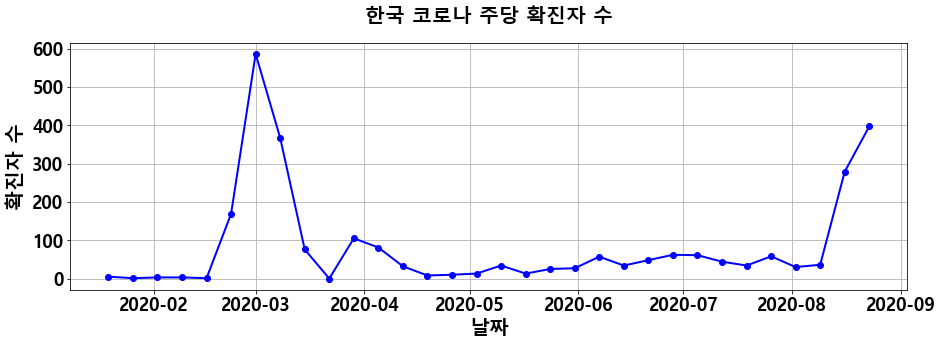

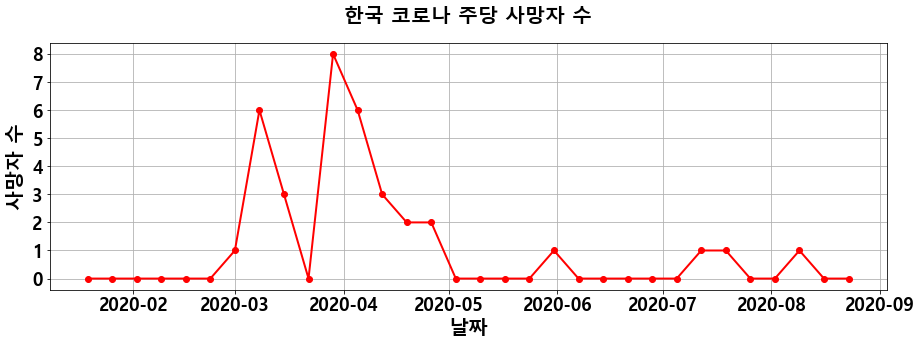

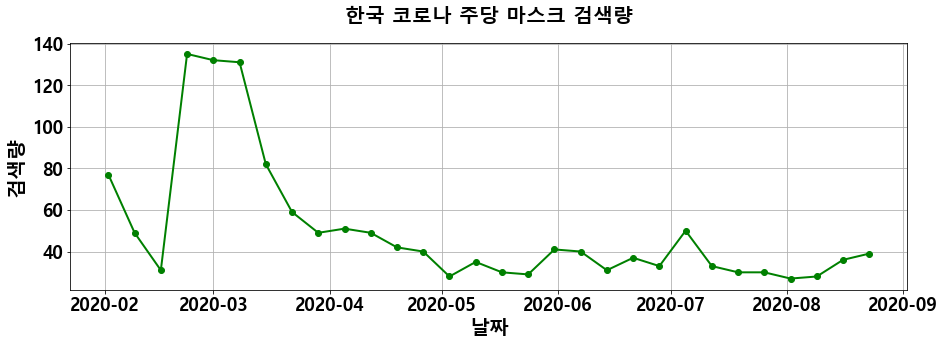

In [51]:
# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('한국 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(KR['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('한국 코로나 주당 사망자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(KR['사망자(주)'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('사망자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(15,10)).add_subplot(2,1,2)     # 그래프 사이즈 지정
plt.title('한국 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(KRM['검색량'], 'g', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

## 미국

In [13]:
US = covid19[covid19.국가 == 'United States of America']
USM = search_mask[search_mask.국가 == '미국']
US = US.set_index('날짜')
USM = USM.set_index('날짜')

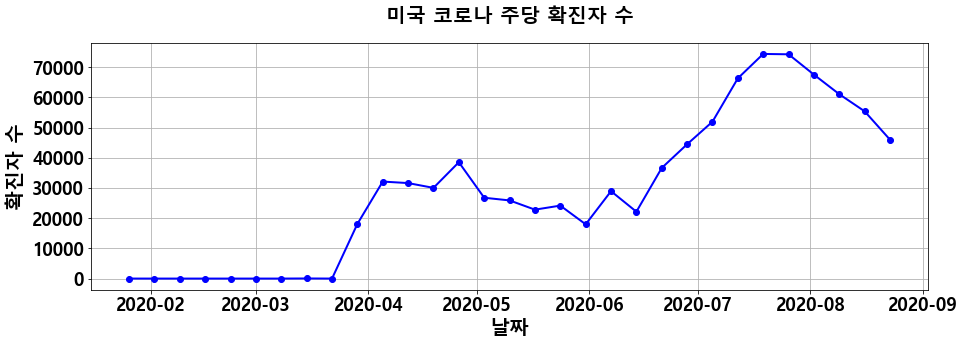

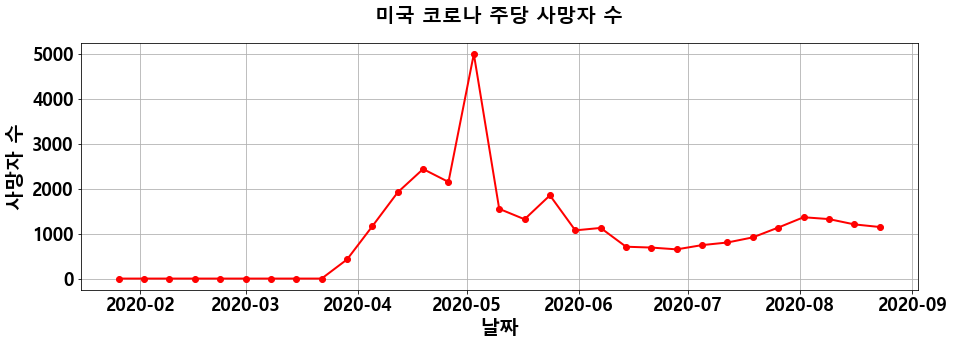

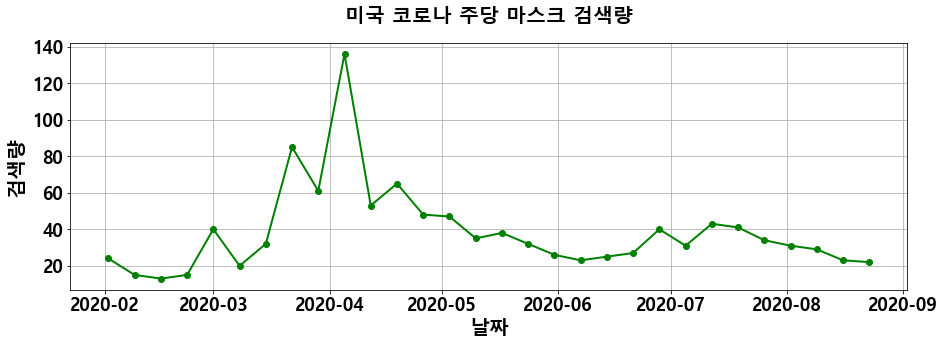

In [52]:
# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('미국 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(US['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('미국 코로나 주당 사망자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(US['사망자(주)'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('사망자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(15,10)).add_subplot(2,1,2)     # 그래프 사이즈 지정
plt.title('미국 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(USM['검색량'], 'g', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

## 브라질

In [15]:
BR = covid19[covid19.국가 == 'Brazil']
BRM = search_mask[search_mask.국가 == '브라질']
BR = BR.set_index('날짜')
BRM = BRM.set_index('날짜')

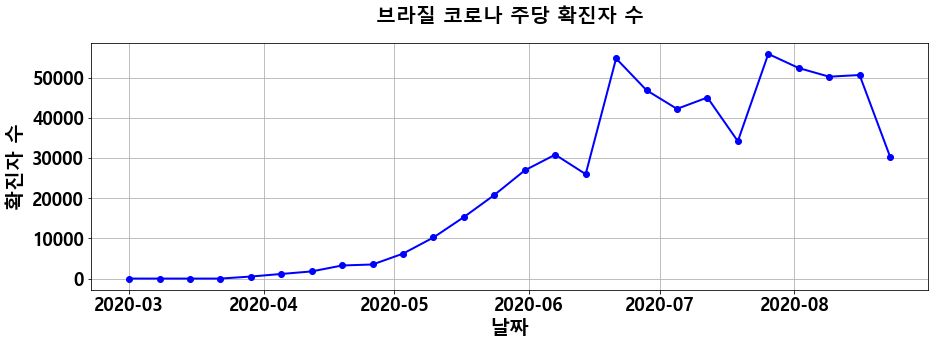

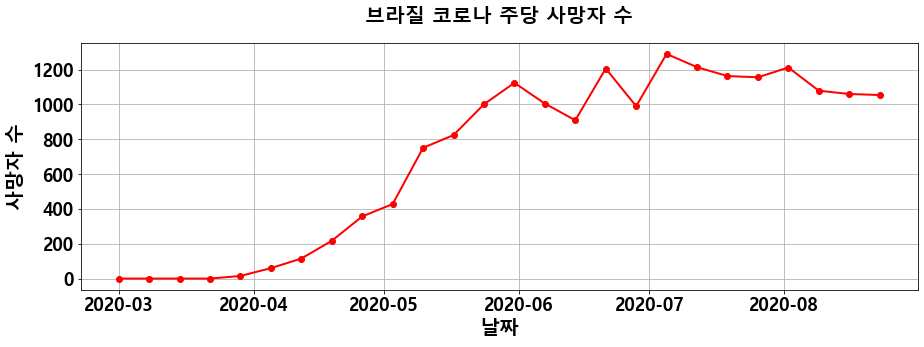

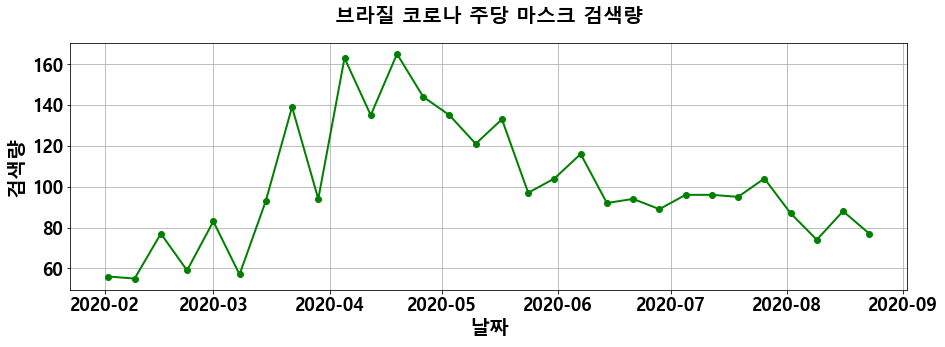

In [53]:
# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('브라질 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(BR['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('브라질 코로나 주당 사망자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(BR['사망자(주)'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('사망자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(15,10)).add_subplot(2,1,2)     # 그래프 사이즈 지정
plt.title('브라질 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(BRM['검색량'], 'g', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

## 인도

In [17]:
IN = covid19[covid19.국가 == 'India']
INM = search_mask[search_mask.국가 == '인도']
IN = IN.set_index('날짜')
INM = INM.set_index('날짜')

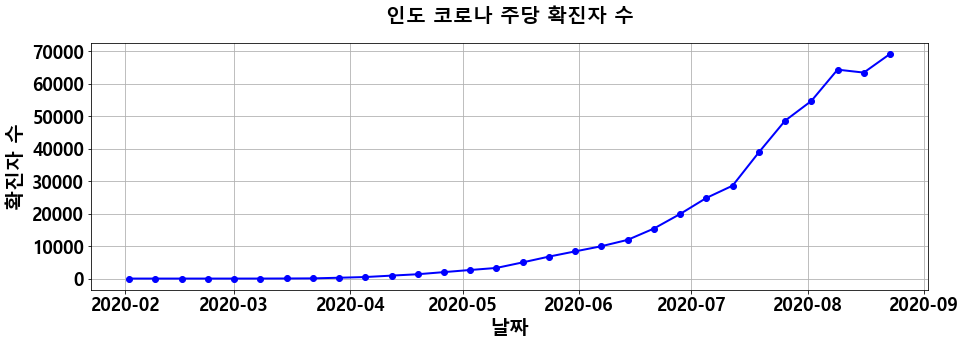

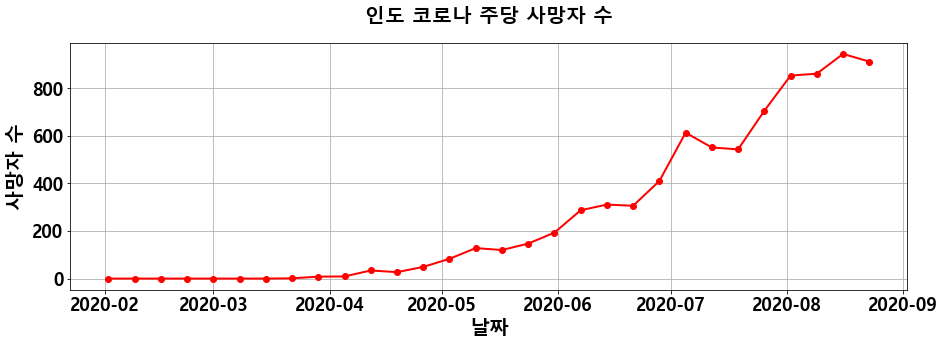

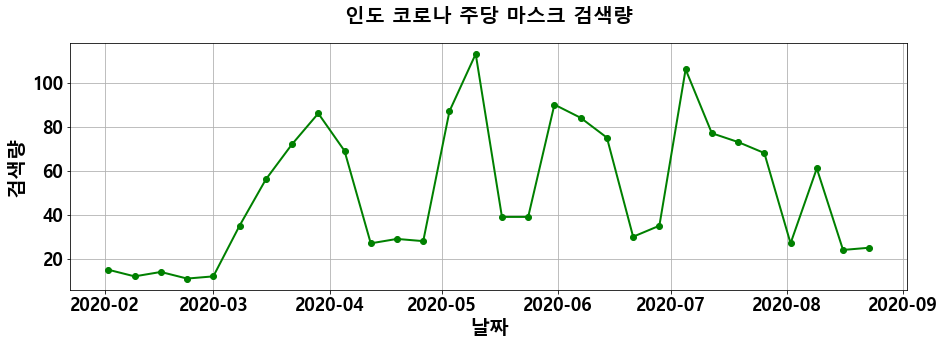

In [54]:
# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('인도 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(IN['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('인도 코로나 주당 사망자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(IN['사망자(주)'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('사망자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(15,10)).add_subplot(2,1,2)     # 그래프 사이즈 지정
plt.title('인도 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(INM['검색량'], 'g', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

## 멕시코

In [19]:
MX = covid19[covid19.국가 == 'Mexico']
MXM = search_mask[search_mask.국가 == '멕시코']
MX = MX.set_index('날짜')
MXM = MXM.set_index('날짜')

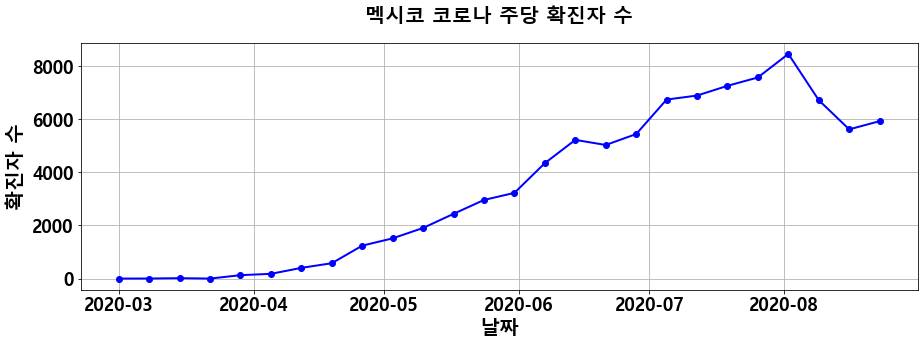

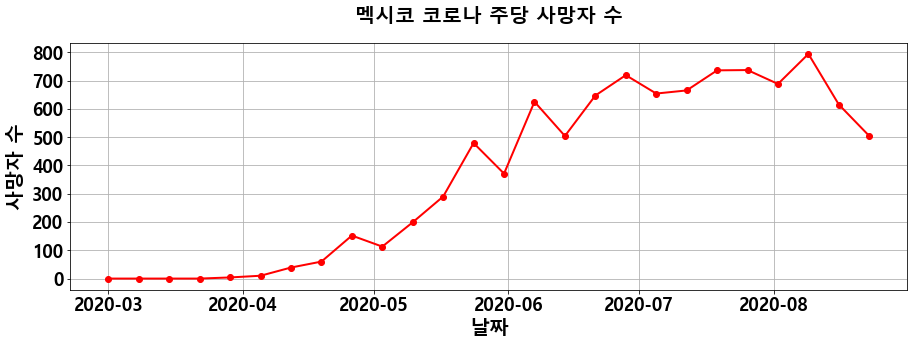

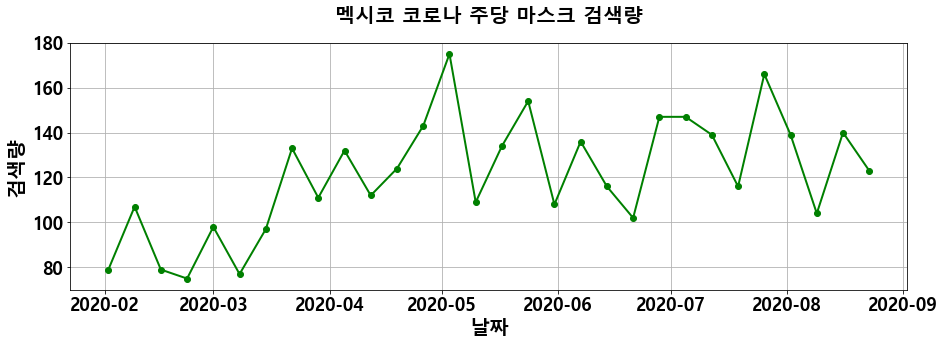

In [55]:
# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('멕시코 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(MX['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('멕시코 코로나 주당 사망자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(MX['사망자(주)'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('사망자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(15,10)).add_subplot(2,1,2)     # 그래프 사이즈 지정
plt.title('멕시코 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(MXM['검색량'], 'g', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

## 스페인

In [21]:
ES = covid19[covid19.국가 == 'Spain']
ESM = search_mask[search_mask.국가 == '스페인']
ES = ES.set_index('날짜')
ESM = ESM.set_index('날짜')

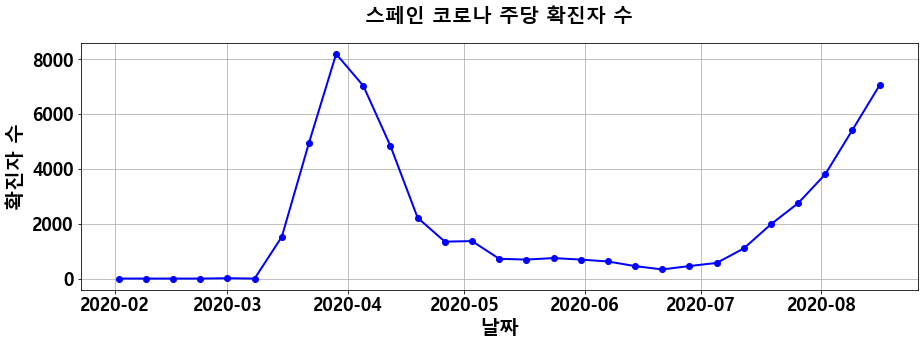

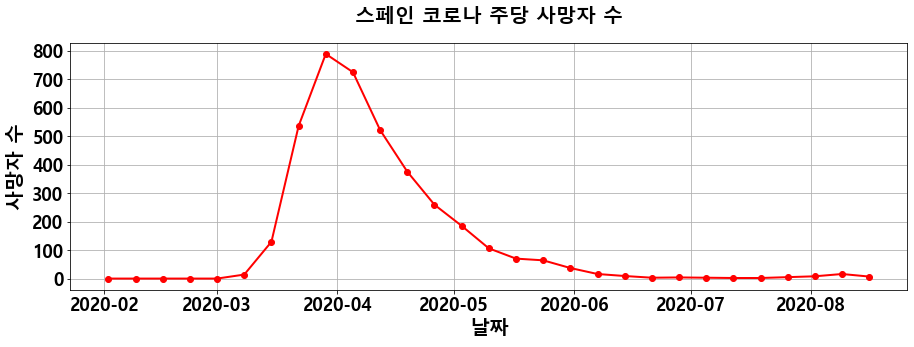

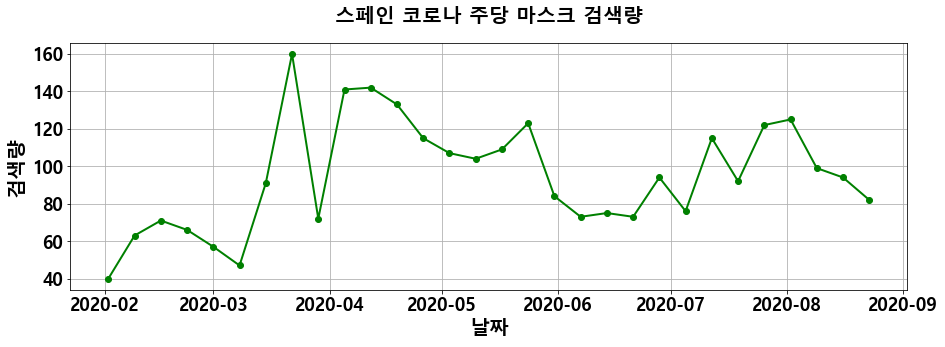

In [56]:
# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('스페인 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(ES['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('스페인 코로나 주당 사망자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(ES['사망자(주)'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('사망자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(15,10)).add_subplot(2,1,2)     # 그래프 사이즈 지정
plt.title('스페인 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(ESM['검색량'], 'g', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

## 영국

In [23]:
GB = covid19[covid19.국가 == 'The United Kingdom']
GBM = search_mask[search_mask.국가 == '영국']
GB = GB.set_index('날짜')
GBM = GBM.set_index('날짜')

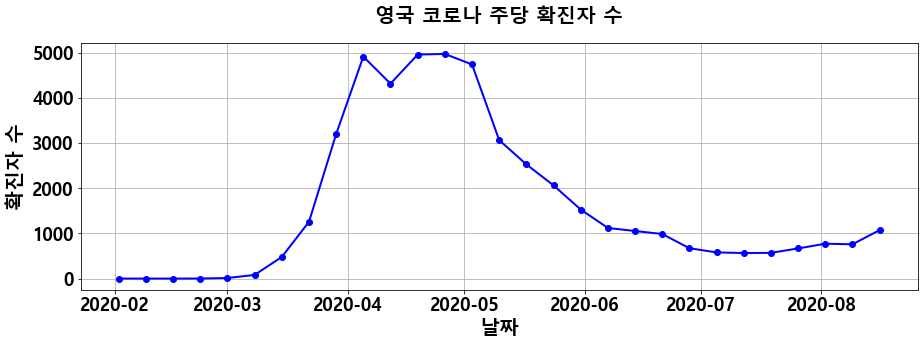

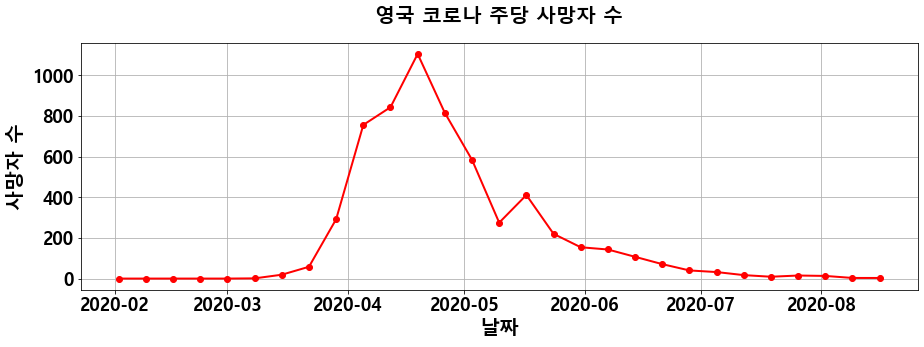

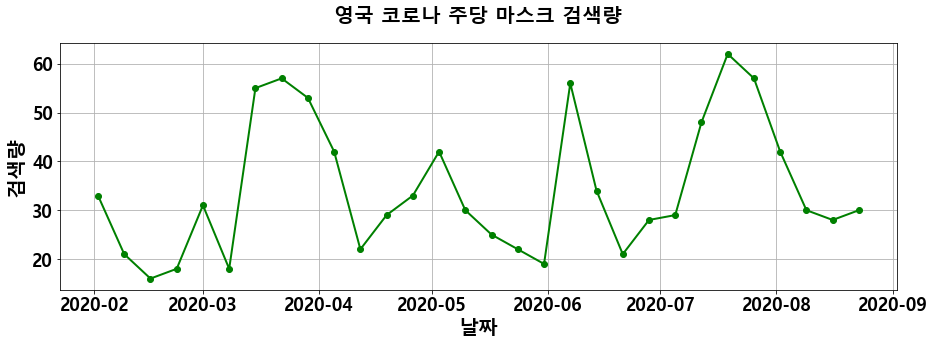

In [57]:
# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('영국 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(GB['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('영국 코로나 주당 사망자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(GB['사망자(주)'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('사망자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(15,10)).add_subplot(2,1,2)     # 그래프 사이즈 지정
plt.title('영국 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(GBM['검색량'], 'g', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

## 프랑스

In [25]:
FR = covid19[covid19.국가 == 'France']
FRM = search_mask[search_mask.국가 == '프랑스']
FR = FR.set_index('날짜')
FRM = FRM.set_index('날짜')

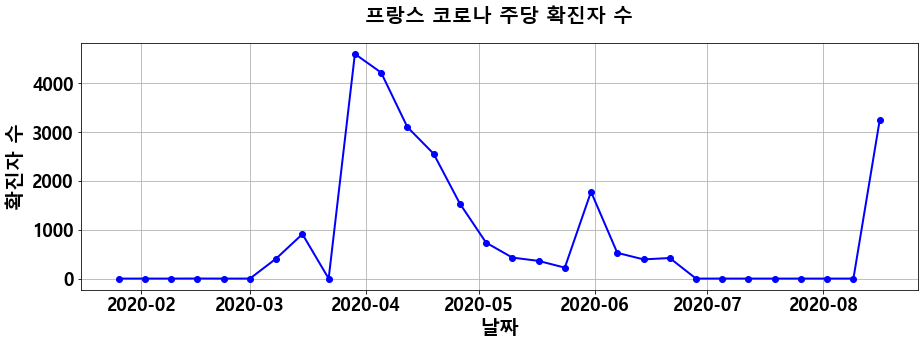

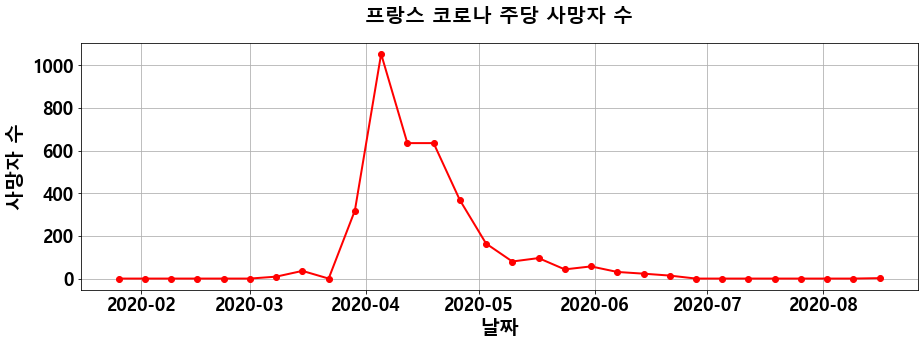

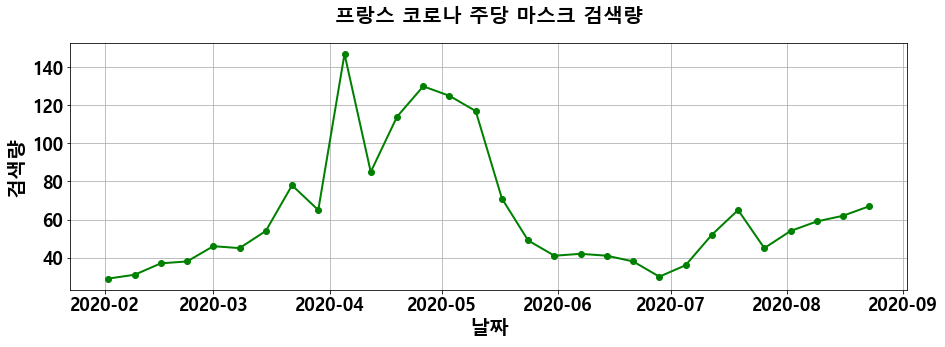

In [58]:
# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('프랑스 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(FR['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('프랑스 코로나 주당 사망자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(FR['사망자(주)'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('사망자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(15,10)).add_subplot(2,1,2)     # 그래프 사이즈 지정
plt.title('프랑스 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(FRM['검색량'], 'g', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

## 이탈리아

In [27]:
IT = covid19[covid19.국가 == 'Italy']
ITM = search_mask[search_mask.국가 == '이탈리아']
IT = IT.set_index('날짜')
ITM = ITM.set_index('날짜')

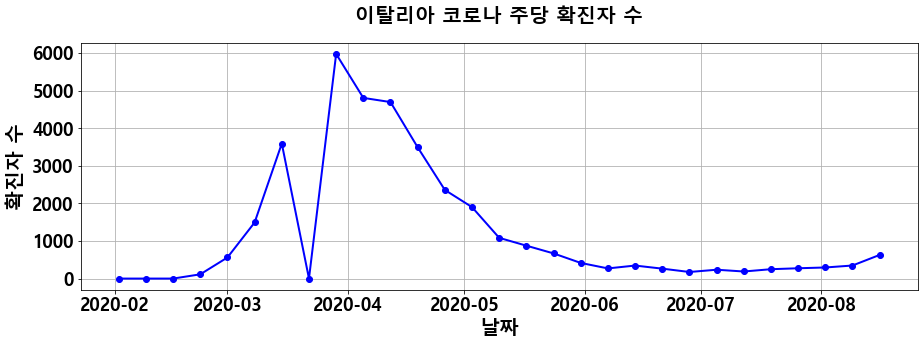

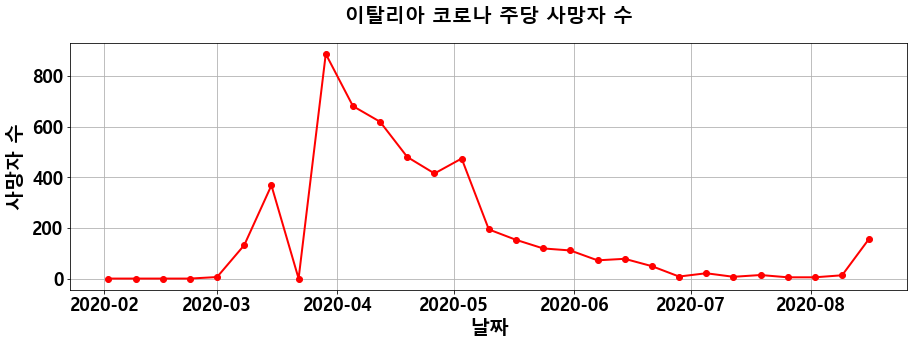

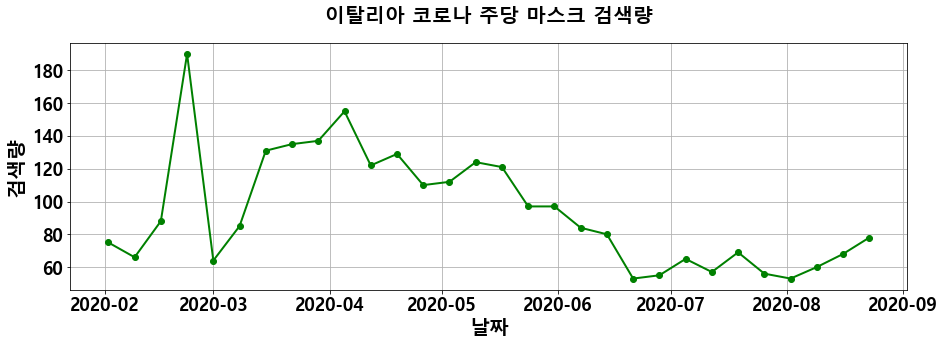

In [59]:
# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('이탈리아 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(IT['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('이탈리아 코로나 주당 사망자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(IT['사망자(주)'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('사망자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(15,10)).add_subplot(2,1,2)     # 그래프 사이즈 지정
plt.title('이탈리아 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(ITM['검색량'], 'g', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

## 독일

In [29]:
DE = covid19[covid19.국가 == 'Germany']
DEM = search_mask[search_mask.국가 == '독일']
DE = DE.set_index('날짜')
DEM = DEM.set_index('날짜')

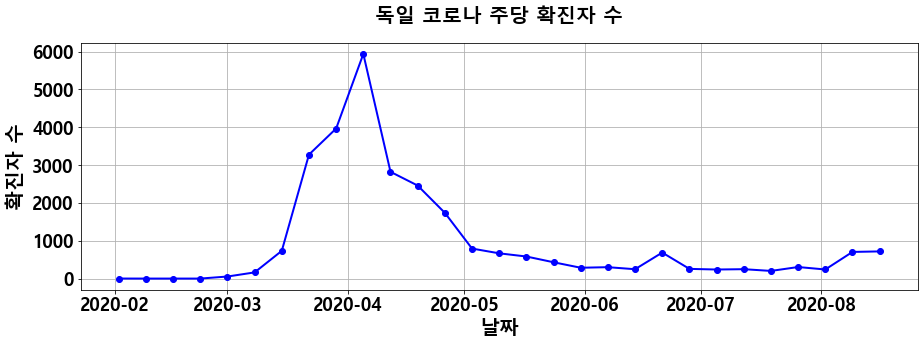

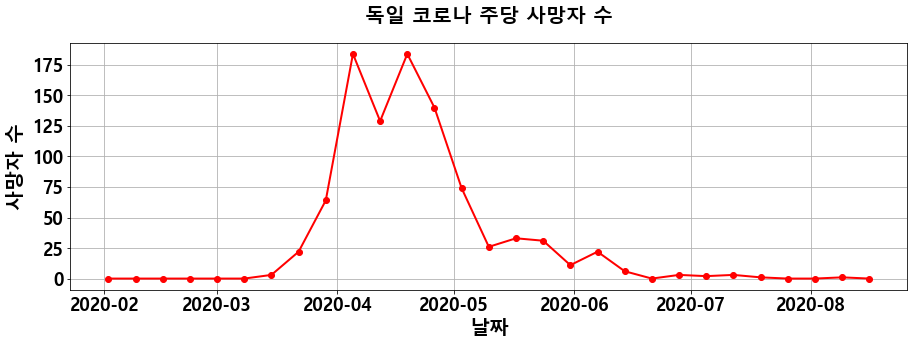

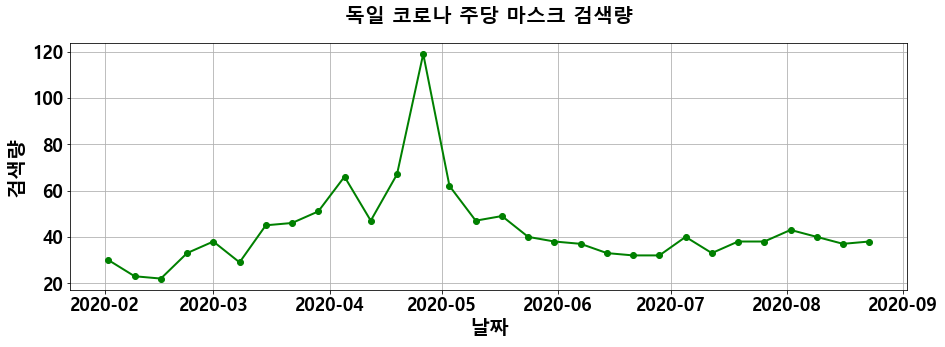

In [60]:
# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('독일 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(DE['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(15,10)).add_subplot(2,1,1)     # 그래프 사이즈 지정
plt.title('독일 코로나 주당 사망자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(DE['사망자(주)'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('사망자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(15,10)).add_subplot(2,1,2)     # 그래프 사이즈 지정
plt.title('독일 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(DEM['검색량'], 'g', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 모음

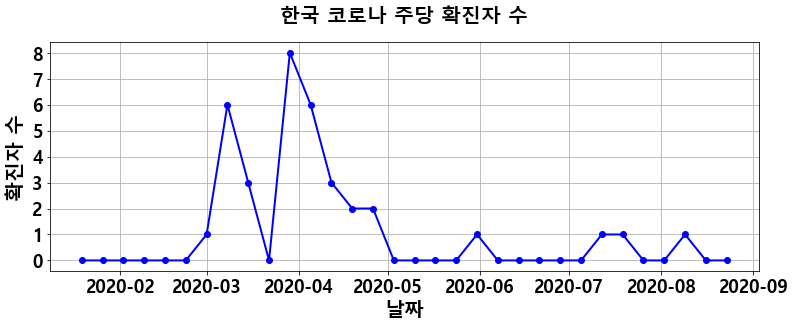

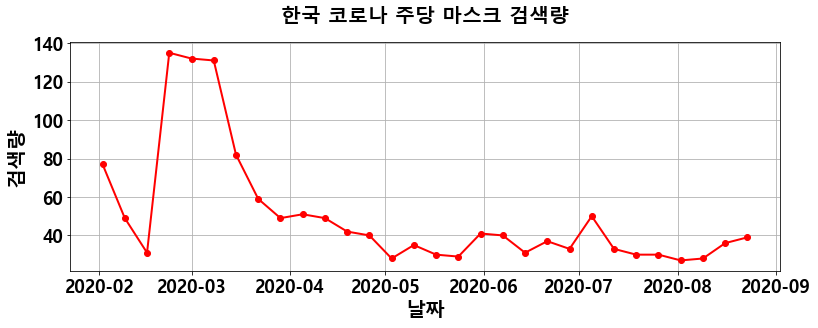

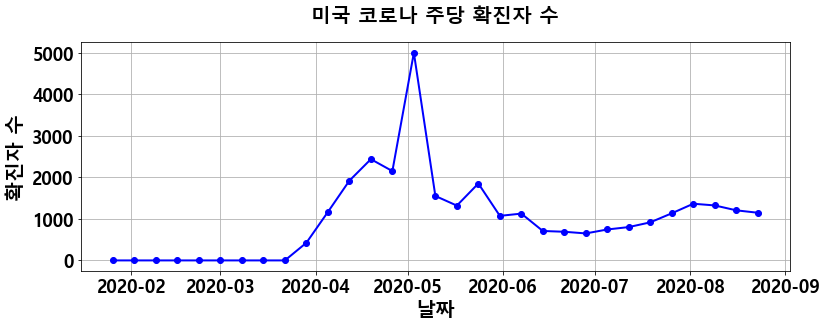

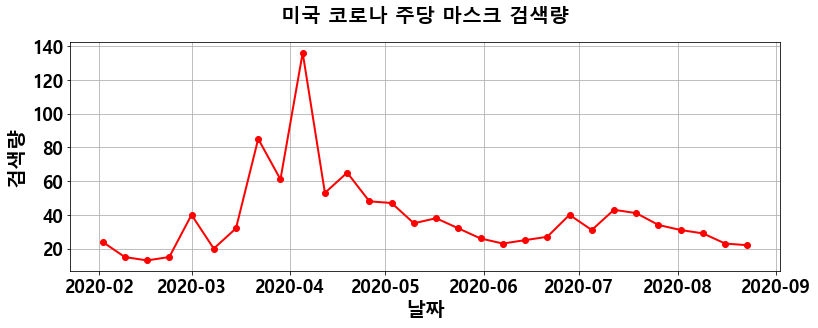

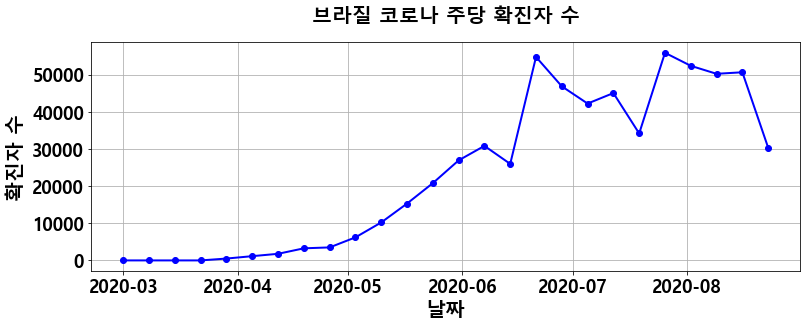

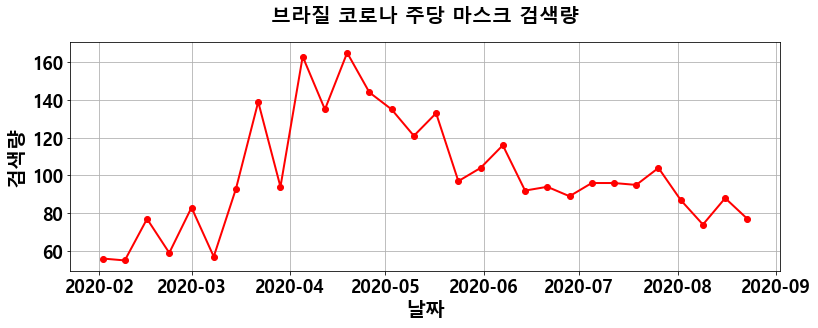

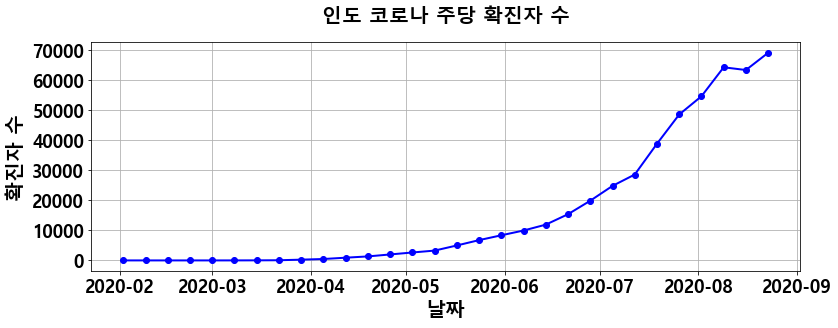

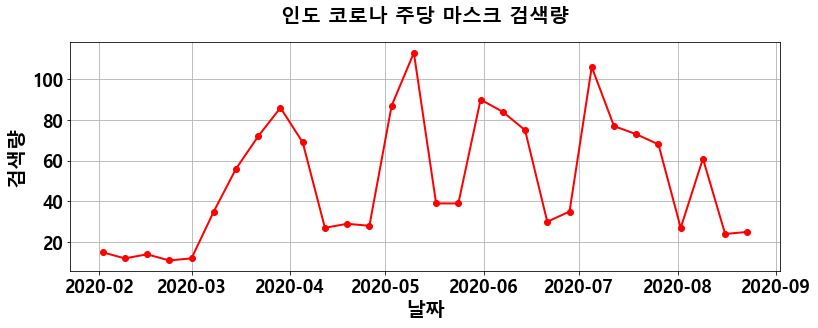

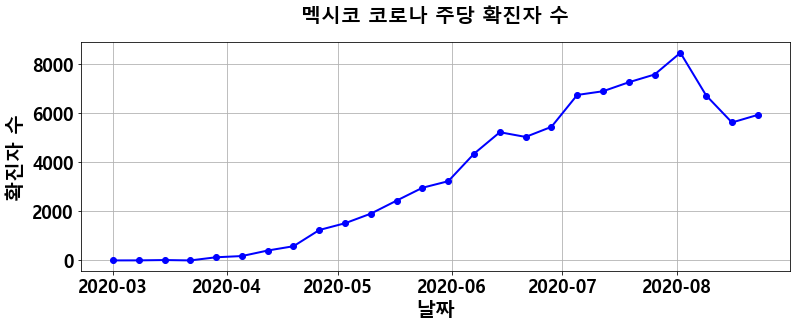

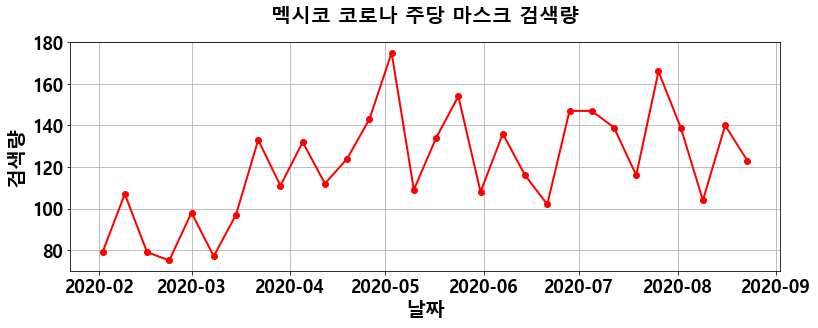

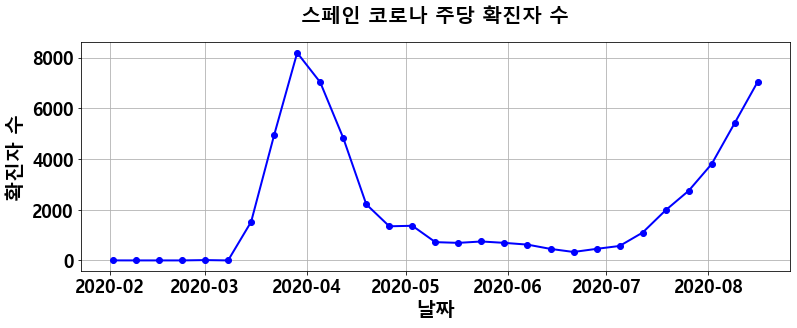

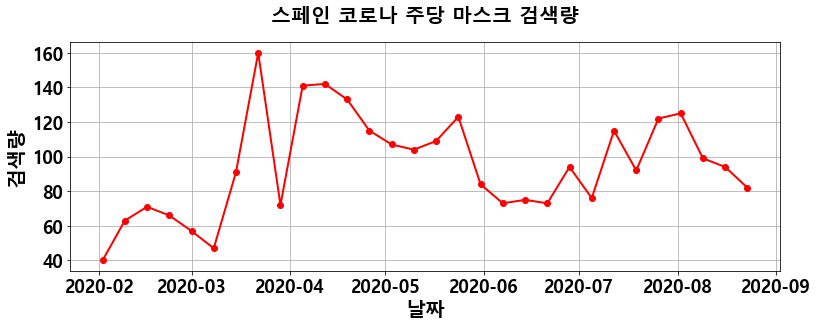

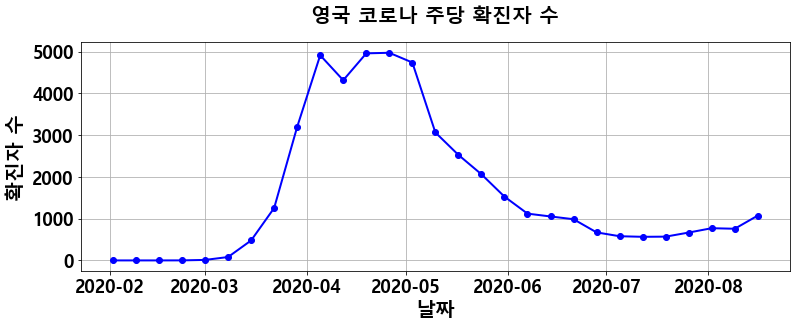

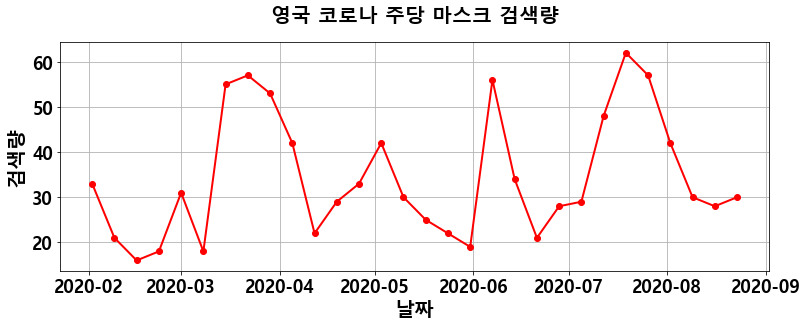

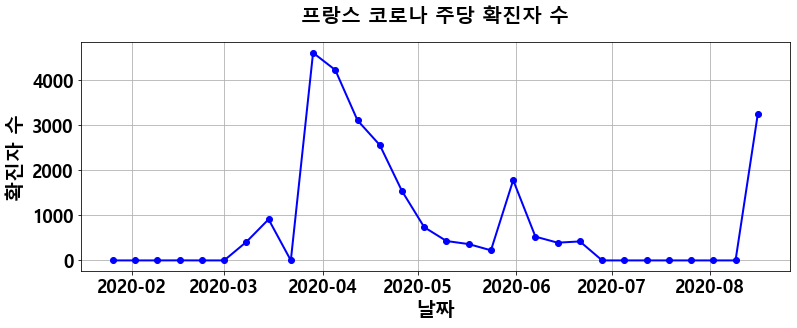

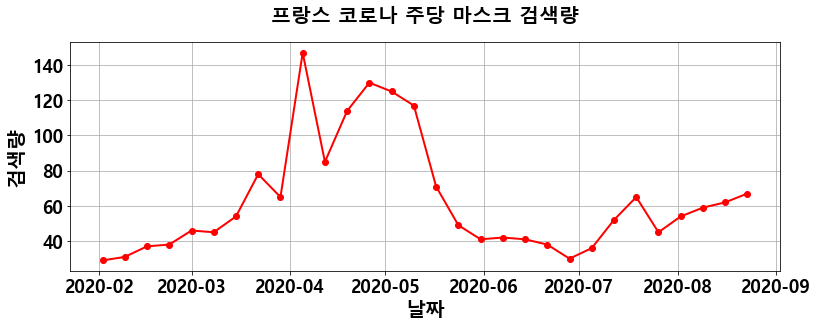

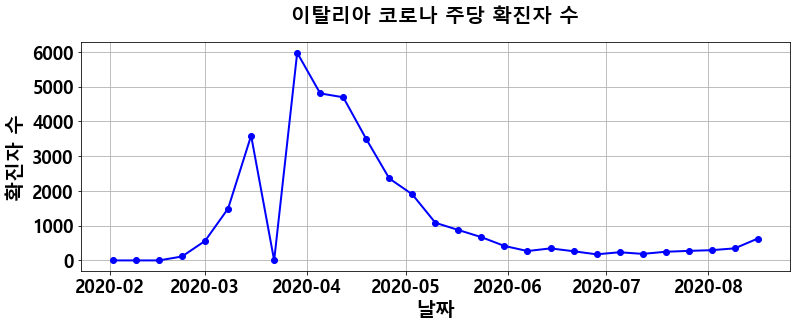

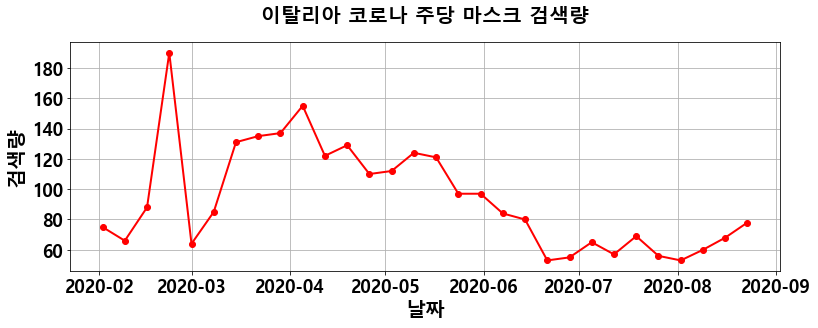

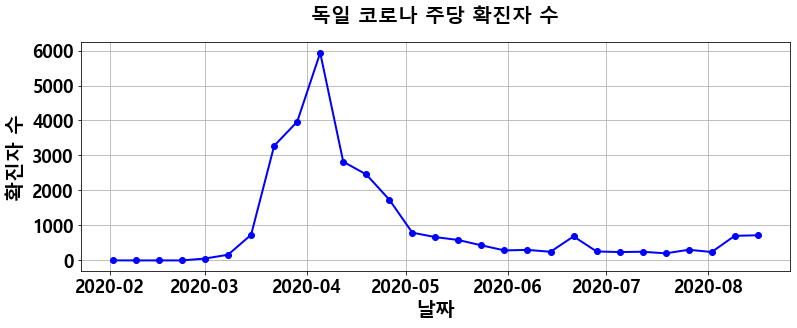

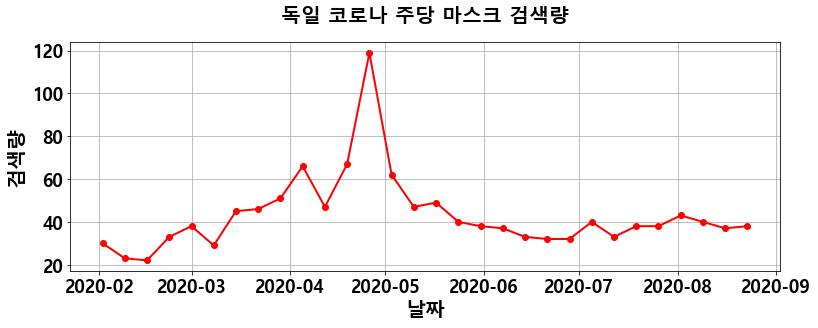

In [41]:
# 그래프 그리기
plt.figure(figsize=(150,100)).add_subplot(20,10,1)     # 그래프 사이즈 지정
plt.title('한국 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(KR['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(150,100)).add_subplot(20,10,2)     # 그래프 사이즈 지정
plt.title('한국 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(KRM['검색량'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(150,100)).add_subplot(20,10,3)     # 그래프 사이즈 지정
plt.title('미국 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(US['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(150,100)).add_subplot(20,10,4)     # 그래프 사이즈 지정
plt.title('미국 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(USM['검색량'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(150,100)).add_subplot(20,10,5)     # 그래프 사이즈 지정
plt.title('브라질 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(BR['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(150,100)).add_subplot(20,10,6)     # 그래프 사이즈 지정
plt.title('브라질 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(BRM['검색량'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(150,100)).add_subplot(20,10,7)     # 그래프 사이즈 지정
plt.title('인도 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(IN['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(150,100)).add_subplot(20,10,8)     # 그래프 사이즈 지정
plt.title('인도 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(INM['검색량'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(150,100)).add_subplot(20,10,9)     # 그래프 사이즈 지정
plt.title('멕시코 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(MX['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(150,100)).add_subplot(20,10,10)     # 그래프 사이즈 지정
plt.title('멕시코 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(MXM['검색량'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(150,100)).add_subplot(20,10,11)     # 그래프 사이즈 지정
plt.title('스페인 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(ES['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(150,100)).add_subplot(20,10,12)     # 그래프 사이즈 지정
plt.title('스페인 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(ESM['검색량'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(150,100)).add_subplot(20,10,13)     # 그래프 사이즈 지정
plt.title('영국 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(GB['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(150,100)).add_subplot(20,10,14)     # 그래프 사이즈 지정
plt.title('영국 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(GBM['검색량'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(150,100)).add_subplot(20,10,15)     # 그래프 사이즈 지정
plt.title('프랑스 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(FR['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(150,100)).add_subplot(20,10,16)     # 그래프 사이즈 지정
plt.title('프랑스 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(FRM['검색량'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(150,100)).add_subplot(20,10,17)     # 그래프 사이즈 지정
plt.title('이탈리아 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(IT['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(150,100)).add_subplot(20,10,18)     # 그래프 사이즈 지정
plt.title('이탈리아 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(ITM['검색량'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

# 그래프 그리기
plt.figure(figsize=(150,100)).add_subplot(20,10,19)     # 그래프 사이즈 지정
plt.title('독일 코로나 주당 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(DE['확진자(주)'], 'b', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시

plt.figure(figsize=(150,100)).add_subplot(20,10,20)     # 그래프 사이즈 지정
plt.title('독일 코로나 주당 마스크 검색량', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(DEM['검색량'], 'r', marker='o', linewidth=2)
plt.xticks(fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('검색량', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시